In [ ]:
# 12. Design an object detection model using deep neural networks for simple objects.
# a. Select appropriate dataset and perform data pre-processing
# b. Define architecture in terms of layers
# c. Evaluate Model performance Label the object with appropriate text.


import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import random
from PIL import Image, ImageDraw
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
def generate_sample(image_size=64):
    image = Image.new('RGB', (image_size, image_size), (0, 0, 0))
    draw = ImageDraw.Draw(image)
    shape_type = random.choice(['rectangle', 'circle', 'triangle'])
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    
    w = random.randint(8, 32)
    h = random.randint(8, 32)
    x = random.randint(0, image_size - w)
    y = random.randint(0, image_size - h)
    
    if shape_type == 'rectangle':
        draw.rectangle([x, y, x + w, y + h], fill=color)
        bbox = [x, y, x + w, y + h]
    elif shape_type == 'circle':
        radius = min(w, h) // 2
        cx, cy = x + w//2, y + h//2
        draw.ellipse([cx - radius, cy - radius, cx + radius, cy + radius], fill=color)
        bbox = [cx - radius, cy - radius, cx + radius, cy + radius]
    elif shape_type == 'triangle':
        points = [(x, y + h), (x + w, y + h), (x + w//2, y)]
        draw.polygon(points, fill=color)
        xs = [x, x + w, x + w//2]
        ys = [y + h, y + h, y]
        bbox = [min(xs), min(ys), max(xs), max(ys)]
    
    image_np = np.array(image) / 255.0
    bbox_norm = [coord/image_size for coord in bbox]
    label = {'rectangle':0, 'circle':1, 'triangle':2}[shape_type]
    return image_np, bbox_norm, label

# Generate data
samples = 2000
images, bboxes, labels = [], [], []
for _ in range(samples):
    img, bbox, lbl = generate_sample()
    images.append(img)
    bboxes.append(bbox)
    labels.append(lbl)

X = np.array(images)
Y_bbox = np.array(bboxes)
Y_label = np.array(labels)

# Split data
X_train, X_test, Y_train_bbox, Y_test_bbox, Y_train_label, Y_test_label = train_test_split(
    X, Y_bbox, Y_label, test_size=0.2, random_state=42)

# Define model
input_layer = layers.Input(shape=(64, 64, 3))
x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
output_label = layers.Dense(3, activation='softmax', name='label')(x)
output_bbox = layers.Dense(4, activation='sigmoid', name='bbox')(x)
model = models.Model(inputs=input_layer, outputs=[output_label, output_bbox])

# Compile
model.compile(optimizer='adam',
              loss={'label': 'sparse_categorical_crossentropy', 'bbox': 'mse'},
              metrics={'label': 'accuracy', 'bbox': 'mse'})

# Train
history = model.fit(X_train, {'label': Y_train_label, 'bbox': Y_train_bbox},
                    epochs=30, batch_size=32, validation_split=0.2)

2025-05-13 01:52:57.700090: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-05-13 01:52:57.700210: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-13 01:52:57.700215: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-13 01:52:57.700501: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-13 01:52:57.700517: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/30


2025-05-13 01:52:58.908678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-05-13 01:52:58.916477: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - bbox_loss: 0.0446 - bbox_mse: 0.0446 - label_accuracy: 0.4167 - label_loss: 1.0541 - loss: 1.0986 - val_bbox_loss: 0.0159 - val_bbox_mse: 0.0159 - val_label_accuracy: 0.7563 - val_label_loss: 0.5800 - val_loss: 0.5958
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - bbox_loss: 0.0140 - bbox_mse: 0.0140 - label_accuracy: 0.8416 - label_loss: 0.4264 - loss: 0.4404 - val_bbox_loss: 0.0110 - val_bbox_mse: 0.0110 - val_label_accuracy: 0.9563 - val_label_loss: 0.1661 - val_loss: 0.1771
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - bbox_loss: 0.0084 - bbox_mse: 0.0084 - label_accuracy: 0.9599 - label_loss: 0.1262 - loss: 0.1346 - val_bbox_loss: 0.0077 - val_bbox_mse: 0.0077 - val_label_accuracy: 0.9969 - val_label_loss: 0.0528 - val_loss: 0.0604
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - bbox_loss: 0.0066 - bbox_mse: 0.0066 - label_accuracy: 0.9954 - label_loss: 0.0337 - loss: 0.0403 - val_bbox_loss: 0.0064 - val_bbox_mse: 0.0064 

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - bbox_loss: 0.0032 - bbox_mse: 0.0032 - label_accuracy: 0.9940 - label_loss: 0.0116 - loss: 0.0149  
Test Loss: [0.01274471078068018, 0.009233636781573296, 0.003226849716156721, 0.0032426854595541954, 0.9950000047683716]
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Classification Accuracy: 0.995
Average IoU: 0.5429483263932429


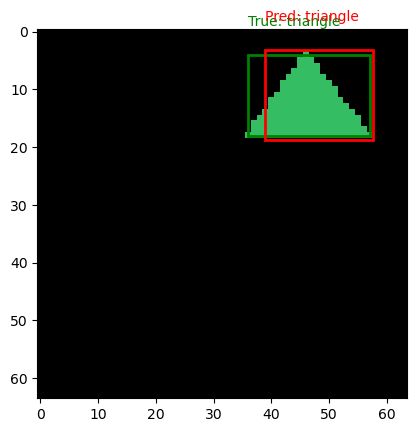

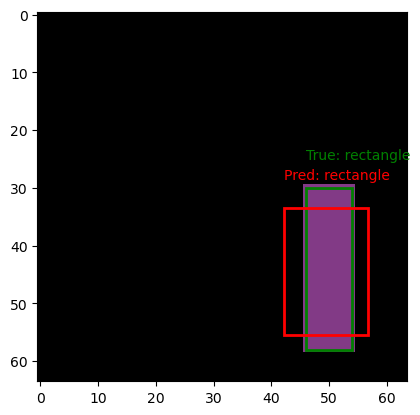

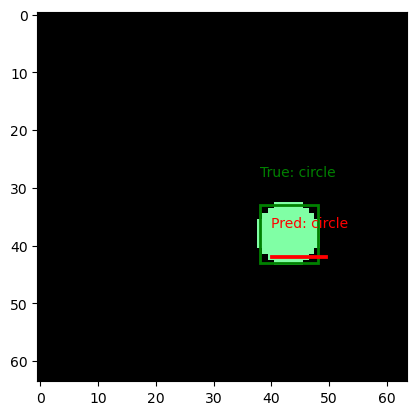

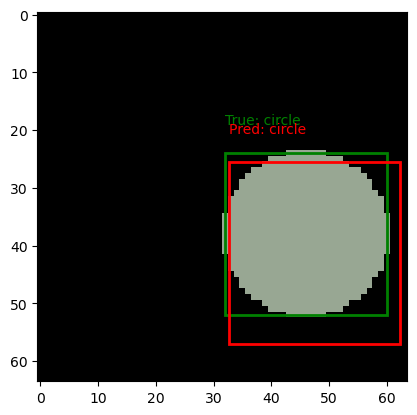

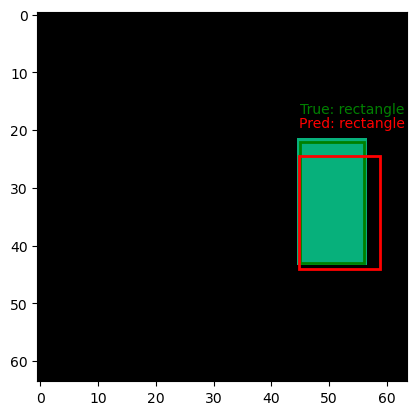

In [2]:
# Evaluate
test_loss = model.evaluate(X_test, {'label': Y_test_label, 'bbox': Y_test_bbox})
print(f"Test Loss: {test_loss}")

# Predictions
predictions = model.predict(X_test)
pred_labels = np.argmax(predictions[0], axis=1)
pred_bboxes = predictions[1]

# Calculate metrics
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test_label, pred_labels)
print(f"Classification Accuracy: {accuracy}")

def calculate_iou(boxA, boxB):
    boxA = [coord * 64 for coord in boxA]
    boxB = [coord * 64 for coord in boxB]
    xA, yA = max(boxA[0], boxB[0]), max(boxA[1], boxB[1])
    xB, yB = min(boxA[2], boxB[2]), min(boxA[3], boxB[3])
    inter = max(0, xB - xA) * max(0, yB - yA)
    areaA = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    areaB = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    iou = inter / (areaA + areaB - inter + 1e-10)
    return iou

ious = [calculate_iou(Y_test_bbox[i], pred_bboxes[i]) for i in range(len(Y_test_bbox))]
average_iou = np.mean(ious)
print(f"Average IoU: {average_iou}")

# Visualization
import matplotlib.pyplot as plt
def plot_prediction(idx):
    class_names = ['rectangle', 'circle', 'triangle']
    img = X_test[idx]
    true_label = Y_test_label[idx]
    true_bbox = Y_test_bbox[idx]
    pred_label = pred_labels[idx]
    pred_bbox = pred_bboxes[idx]
    
    plt.imshow(img)
    ax = plt.gca()
    
    # True (green)
    xmin, ymin, xmax, ymax = [c * 64 for c in true_bbox]
    ax.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, fill=False, edgecolor='green', linewidth=2))
    plt.text(xmin, ymin - 5, f'True: {class_names[true_label]}', color='green')
    
    # Pred (red)
    xmin_p, ymin_p, xmax_p, ymax_p = [c * 64 for c in pred_bbox]
    ax.add_patch(plt.Rectangle((xmin_p, ymin_p), xmax_p-xmin_p, ymax_p-ymin_p, fill=False, edgecolor='red', linewidth=2))
    plt.text(xmin_p, ymin_p - 5, f'Pred: {class_names[pred_label]}', color='red')
    plt.show()

# Plot 5 samples
for i in range(5):
    plot_prediction(i)
    

In [5]:
#standered dataset
!pip install tensorflow tensorflow_datasets matplotlib numpy


In [6]:
# Install required libraries (run once)
# 

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Load Pascal VOC 2012 dataset
(train_ds, test_ds), info = tfds.load(
    'voc/2012',
    split=['train', 'validation'],
    with_info=True,
    shuffle_files=True,
    data_dir='./data'
)

# Class names (20 objects)
class_names = info.features['objects']['label'].names

# Preprocess function (simplified: takes first object per image)
def preprocess(data):
    image = tf.image.resize(data['image'], (128, 128)) / 255.0  # Resize + normalize
    bbox = data['objects']['bbox'][0]  # First object's bbox [y1, x1, y2, x2]
    label = data['objects']['label'][0]  # First object's class
    return image, (label, bbox)

# Prepare datasets
train_ds = train_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).batch(32)

# Simple CNN model with two outputs (class + bbox)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    # Dual outputs
    tf.keras.layers.Dense(20, activation='softmax', name='class'),  # 20 classes
    tf.keras.layers.Dense(4, activation='sigmoid', name='bbox')     # 4 bbox coords
])

# Compile with multi-task loss
model.compile(
    optimizer='adam',
    loss={
        'class': 'sparse_categorical_crossentropy',
        'bbox': 'mse'
    },
    metrics={
        'class': 'accuracy',
        'bbox': 'mse'
    }
)

# Train (5 epochs for quick demo)
history = model.fit(train_ds, epochs=5, validation_data=test_ds)

# Evaluate
results = model.evaluate(test_ds)
print(f"Class Accuracy: {results[3]:.2f}, BBox MSE: {results[4]:.4f}")

# Visualization function
def plot_prediction(image, true_label, true_bbox, pred_label, pred_bbox):
    plt.imshow(image)
    ax = plt.gca()
    # Convert normalized coords to pixels
    h, w = image.shape[0], image.shape[1]
    # True (green)
    y1, x1, y2, x2 = true_bbox
    ax.add_patch(plt.Rectangle((x1*w, y1*h), (x2-x1)*w, (y2-y1)*h,
                  fill=False, edgecolor='green', linewidth=2))
    plt.text(x1*w, y1*h-5, f'True: {class_names[true_label]}', color='green')
    # Pred (red)
    y1, x1, y2, x2 = pred_bbox
    ax.add_patch(plt.Rectangle((x1*w, y1*h), (x2-x1)*w, (y2-y1)*h,
                  fill=False, edgecolor='red', linewidth=2))
    plt.text(x1*w, y1*h-5, f'Pred: {class_names[pred_label]}', color='red')
    plt.show()

# Test on 3 samples
for image, (label, bbox) in test_ds.take(3):
    pred_class, pred_bbox = model.predict(tf.expand_dims(image, axis=0))
    plot_prediction(
        image.numpy(), 
        label.numpy()[0], 
        bbox.numpy()[0],
        np.argmax(pred_class[0]),
        pred_bbox[0]
    )
    

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

TooManyRedirects: Exceeded 30 redirects.